1) Se cargan las librerias necesarias

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


2) Se carga la base de datos

In [172]:
medical_appointments = pd.read_csv('Attendance of Medical Appointments in Brazil (may2016).csv')

3. Visualizacion de datos

In [173]:
# Numero de filas y columnas
medical_appointments.shape

(110527, 14)

In [174]:
# Encabezados
medical_appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [175]:
# Tipo de datos
data_types = medical_appointments.dtypes
print(data_types)


PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


In [176]:
# Numero de valores unicos por columna
column_counts = medical_appointments.nunique()
print(column_counts)

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


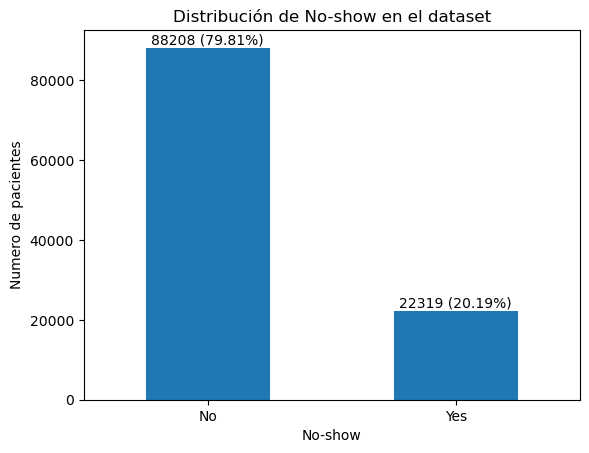

In [177]:
# Distribución del dataset
class_counts = medical_appointments['No-show'].value_counts()
class_counts.plot(kind='bar', rot=0)
plt.xlabel('No-show')
plt.ylabel('Numero de pacientes')
plt.title('Distribución de No-show en el dataset')
for i, count in enumerate(class_counts):
    plt.text(i, count, f'{count} ({count / len(medical_appointments) * 100:.2f}%)', ha='center', va='bottom')
plt.show()

In [178]:
# Evaluar presencia de Missing values
missing_values = medical_appointments.isnull().sum()
print(missing_values)

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


4. Feature Engeniering

In [179]:
from sklearn.preprocessing import LabelEncoder
# Crear una copia del dataset original
medical_appointments_transformed = medical_appointments.copy()

# Transformar las fechas a formato datetime
medical_appointments_transformed['ScheduledDay'] = pd.to_datetime(medical_appointments_transformed['ScheduledDay'])
medical_appointments_transformed['AppointmentDay'] = pd.to_datetime(medical_appointments_transformed['AppointmentDay'])

# Se convierten las fechas a numeros
medical_appointments_transformed['ScheduledDay'] = medical_appointments_transformed['ScheduledDay'].dt.strftime('%Y%m%d').astype(int)
medical_appointments_transformed['AppointmentDay'] = medical_appointments_transformed['AppointmentDay'].dt.strftime('%Y%m%d').astype(int)

# Crear una instancia de la clase LabelEncoder
label_encoder = LabelEncoder()

# Convertir las columnas object a numericas
medical_appointments_transformed['Gender'] = label_encoder.fit_transform(medical_appointments_transformed['Gender'])
medical_appointments_transformed['No-show'] = label_encoder.fit_transform(medical_appointments_transformed['No-show'])
medical_appointments_transformed['Neighbourhood'] = label_encoder.fit_transform(medical_appointments_transformed['Neighbourhood'])

# Tipo de datos
data_types = medical_appointments_transformed.dtypes
print(data_types)

PatientId         float64
AppointmentID       int64
Gender              int64
ScheduledDay        int64
AppointmentDay      int64
Age                 int64
Neighbourhood       int64
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show             int64
dtype: object


5. Entrneamiento del modelo de ML: DecisionTreeRegressor

Accuracy: 0.704841350982113
Precision: 0.2831467295226871
Recall: 0.30140239258031276


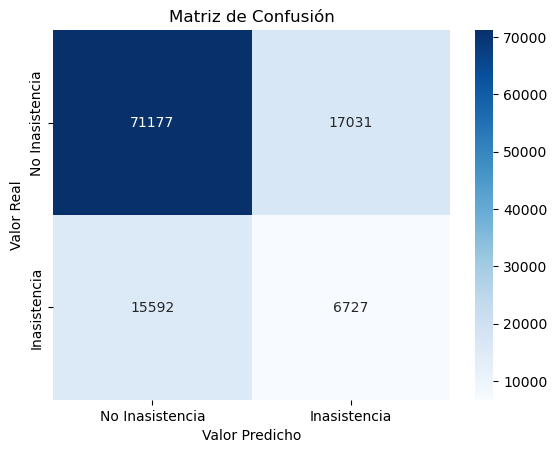

[[71177 17031]
 [15592  6727]]


In [180]:
#  Se define la variable objetivo y las variables predictoras
X = medical_appointments_transformed.drop('No-show', axis=1)
y = medical_appointments_transformed['No-show']

# Crear una instancia de DecisionTreeRegressor
reg_tree = DecisionTreeRegressor()

# Se realiza la validación cruzada
y_pred = cross_val_predict(reg_tree, X, y, cv=5)


# Se crea una matriz de confusión
confusion_mat = confusion_matrix(y, y_pred)
labels = ['No Inasistencia', 'Inasistencia']
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Configuración del gráfico
plt.title('Matriz de Confusión')
plt.xlabel('Valor Predicho')
plt.ylabel('Valor Real')

# Se calculan las métricas de evaluación
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
plt.show()
confusion_mat = confusion_matrix(y, y_pred)
print(confusion_mat)


6. Balanceo de clases

Text(0.5, 1.0, 'Distribución de No-show en el dataset')

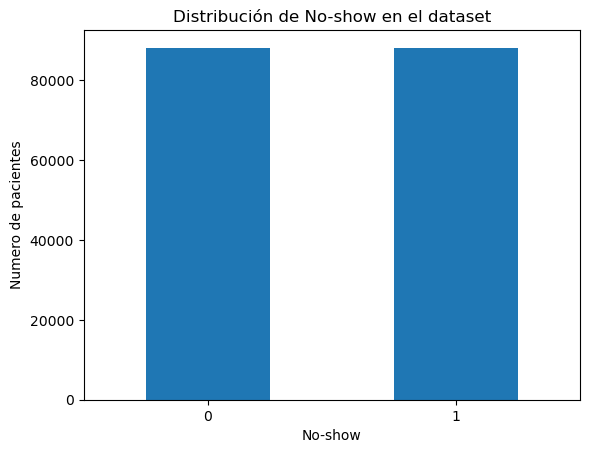

In [181]:
# Se crea una instancia de SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Se aplica SMOTE a los datos
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Se crea una instancia de la clase Pipeline
pipeline = Pipeline([('smote', smote), ('rus', rus)])

# Se aplica el pipeline a los datos
X_balanced, y_balanced = pipeline.fit_resample(X, y)

# Se grafica la distribución de las clases
class_counts = y_balanced.value_counts()
class_counts.plot(kind='bar', rot=0)
plt.xlabel('No-show')
plt.ylabel('Numero de pacientes')
plt.title('Distribución de No-show en el dataset')






7. Nueva prueba con datos balanceados

Accuracy (Datos Balanceados): 0.6417388445492472
Precision (Datos Balanceados): 0.615180520880356
Recall (Datos Balanceados): 0.7570288409214584


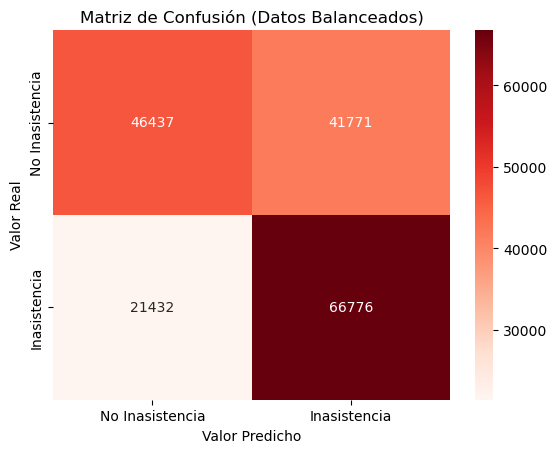

[[46437 41771]
 [21432 66776]]


In [182]:
# Crear una instancia de DecisionTreeRegressor
reg_tree_balanced = DecisionTreeRegressor()

# Realizar la validación cruzada
y_pred_balanced = cross_val_predict(reg_tree_balanced, X_balanced, y_balanced, cv=5)

# Se crea una matriz de confusión
confusion_mat_balanced = confusion_matrix(y_balanced, y_pred_balanced)
labels = ['No Inasistencia', 'Inasistencia']
sns.heatmap(confusion_mat_balanced, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)

# Configuración del gráfico
plt.title('Matriz de Confusión (Datos Balanceados)')
plt.xlabel('Valor Predicho')
plt.ylabel('Valor Real')

# Se calculan las métricas de evaluación
accuracy_balanced = accuracy_score(y_balanced, y_pred_balanced)
precision_balanced = precision_score(y_balanced, y_pred_balanced)
recall_balanced = recall_score(y_balanced, y_pred_balanced)

print("Accuracy (Datos Balanceados):", accuracy_balanced)
print("Precision (Datos Balanceados):", precision_balanced)
print("Recall (Datos Balanceados):", recall_balanced)
plt.show()
confusion_mat_balanced = confusion_matrix(y_balanced, y_pred_balanced)
print(confusion_mat_balanced)


8. Entrneamiento de random forest y optimización de parametros

In [183]:
# Definir los parámetros a probar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear una instancia de RandomForestClassifier
rf = RandomForestClassifier()

# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Entrenar el modelo con los datos balanceados
grid_search.fit(X_balanced, y_balanced)

# Obtener los mejores parámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar la predicción con el mejor modelo
y_pred_best = best_model.predict(X_balanced)

# Crear una matriz de confusión
confusion_mat_best = confusion_matrix(y_balanced, y_pred_best)
labels = ['No Inasistencia', 'Inasistencia']
sns.heatmap(confusion_mat_best, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)

# Configuración del gráfico
plt.title('Matriz de Confusión (Mejor Modelo)')
plt.xlabel('Valor Predicho')
plt.ylabel('Valor Real')

# Calcular las métricas de evaluación
accuracy_best = accuracy_score(y_balanced, y_pred_best)
precision_best = precision_score(y_balanced, y_pred_best)
recall_best = recall_score(y_balanced, y_pred_best)

print("Mejores parámetros:", best_params)
print("Accuracy (Mejor Modelo):", accuracy_best)
print("Precision (Mejor Modelo):", precision_best)
print("Recall (Mejor Modelo):", recall_best)
plt.show()
confusion_mat_best = confusion_matrix(y_balanced, y_pred_best)
print(confusion_mat_best)
